In [1]:
from nltk.tokenize import  sent_tokenize ,word_tokenize
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
documents = ['The taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.Uber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hire a driver, be given false reports about the location of its cars. Uber management booked and then cancelled rides with a rival taxi-hailing company which took their vehicles out of circulation. Uber deny this was the intention. The punishment for this behaviour was negligible. Uber promised not to use this “greyball” software against law enforcement – one wonders what would happen to someone carrying a knife who promised never to stab a policeman with it. Travis Kalanick of Uber got a personal dressing down from Tim Cook, who runs Apple, but the company did not prohibit the use of the app. Too much money was at stake for that.Millions of people around the world value the cheapness and convenience of Uber’s rides too much to care about the lack of drivers’ rights or pay. Many of the users themselves are not much richer than the drivers. The “sharing economy” encourages the insecure and exploited to exploit others equally insecure to the profit of a tiny clique of billionaires. Silicon Valley’s culture seems hostile to humane and democratic values. The outgoing CEO of Yahoo, Marissa Mayer, who is widely judged to have been a failure, is likely to get a $186m payout. This may not be a cause for panic, any more than the previous hero worship should have been a cause for euphoria. Yet there’s an urgent political task to tame these companies, to ensure they are punished when they break the law, that they pay their taxes fairly and that they behave responsibly.']

# Tokenize the article into sentences: sentences
sentences=sent_tokenize(str(documents))
# Tokenize each sentence into words: token_sentences
token_sentences=[word_tokenize(str(sentences)) for sent in sentences]
# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences,binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)


[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11004] getaddrinfo failed>
[nltk_data] Error loading maxent_ne_chunker: <urlopen error [Errno
[nltk_data]     11004] getaddrinfo failed>
[nltk_data] Error loading words: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


(NE Apple/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)
(NE Apple/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)
(NE Apple/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)
(NE Apple/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)
(NE Apple/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)
(NE Apple/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)
(NE Apple/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)
(NE Apple/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)
(NE Apple/NNP)
(

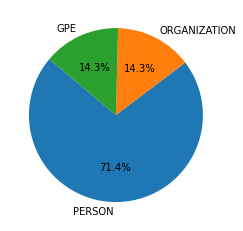

In [2]:
from collections import defaultdict
import matplotlib.pyplot as plt 
# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)
# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences)



# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())
# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

# Comparing NLTK with spaCy NER
Using the same text you used in the first exercise of this chapter, you'll now see the results using spaCy's NER annotator. How will they compare?

The article has been pre-loaded as article. To minimize execution times, you'll be asked to specify the keyword arguments tagger=False, parser=False, matcher=False when loading the spaCy model, because you only care about the entity in this exercise.
# spaCy NER Categories
Which are the extra categories that spacy uses compared to nltk in its named-entity recognition?

NORP, CARDINAL, MONEY, WORKOFART, LANGUAGE, EVENT



In [5]:
# Import spacy
import spacy
# Instantiate the English model: nlp
nlp = spacy.load('en',tagger=False, parser=False, matcher=False)

# Create a new document: doc
doc = nlp(str(documents))

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)


ORG unroll.me
ORG Apple
PERSON Travis Kalanick
PERSON Tim Cook
ORG Apple
CARDINAL Millions
PERSON Uber
LOC Silicon Valley
ORG Yahoo
PERSON Marissa Mayer
MONEY 186


# NER with polyglot 
In this exercise and the next, you'll use the polyglot library to identify French entities. The library functions slightly differently than spacy, so you'll use a few of the new things you learned in the last video to display the named entity text and category.

You have access to the full article string in article. Additionally, the Text class of polyglot has been imported from polyglot.text

In [21]:
from polyglot.text import Text
# Create a new text object using Polyglot's Text class: txt
txt = Text(str(documents))

# Print each of the entities found
for ent in txt.entities:
    print(ent)
    
# Print the type of ent
print(type(ent))
# Create the list of tuples: entities
entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]

# Print entities
print(entities)
# Initialize the count variable: count
count = 0

# Iterate over all the entities
for ent in txt.entities :
    # Check whether the entity contains 'Márquez' or 'Gabo'
    if 'Márquez'in ent or  'Gabo' in ent:
        # Increment count
        count+=1

# Print count
print(count)

# Calculate the percentage of entities that refer to "Gabo": percentage
percentage = count / len(txt.entities)
print(percentage)


ModuleNotFoundError: No module named 'polyglot.text'